In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [11]:
observations = gpd.read_file('../data/SidewalkObservations/SidewalkObservations.shp')
observations.head()

,OBJECTID,SIDEWALK_U,OBSERV_TYP,OBSTRUCTIO,CLEARANCE_,TREE_UNITI,MINIMUM_WI,LEVEL_DIFF,UTILITY_OW,ISOLATED_C,FAILING_SH,SURFACE_CO,OTHER_FEAT,HEIGHT_DIF,GlobalID,geometry
0,1,SDW-44610,SURFCOND,,,,,,,,,CRACK>72,,,d01c130e-e5ff-4105-9e70-cd304fc1991d,POINT (-122.333868062383 47.55421346976489)
1,2,SDW-44610,HEIGHTDIFF,,,TRE-1067558,,UPLIFT,,,,,,0.61,4dd58259-caab-4c0a-9e38-24463d6b2bed,POINT (-122.3335182104243 47.5542197502451)
2,3,SDW-44610,HEIGHTDIFF,,,TRE-1067558,,UPLIFT,,,,,,1.33,5ca774c2-b8d7-4117-8823-fc4390800370,POINT (-122.3334340700717 47.55422600738782)
3,4,SDW-44610,HEIGHTDIFF,,,,,UPLIFT,,,,,,0.73,e0b5e922-07d7-4f04-91e1-e0989a35cc71,POINT (-122.3333873843994 47.55423323384112)
4,5,SDW-44610,HEIGHTDIFF,,,,,SETTLING,,,,,,1.7,6cf3980f-a5f1-487a-bb28-06de9b686f14,POINT (-122.3332620358998 47.55423716133004)


In [9]:
sidewalks = gpd.read_file('../data/map.geojson')
sidewalks.head()

,timestamp,version,changeset,user,uid,direction,name,network,NHS,ref,...,seamark:small_craft_facility:category,classification,service:bicycle:chain_tool,service:bicycle:pump,bin,local_ref,elevator,recycling_type,name:zh,geometry
0,2017-11-03T09:19:25,1312,53473452,andygol,94578,north,I 5 (WA) (North),US:I,Interstate,5,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-122.3224229 47.6466995, -122.3224..."
1,2014-09-23T20:50:45,2,25633651,seattlefyi,692614,None,University Playground,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-122.3197131 47.6648778, -122.318508..."
2,2017-01-06T23:53:43,3,44970184,sctrojan79,2601744,None,Medicinal Herb Garden,None,None,None,...,None,None,None,None,None,None,None,None,None,"(POLYGON ((-122.3088177 47.652345, -122.308763..."
3,2017-10-16T10:09:43,33,52977549,Teesta,6443638,None,Route 372: University District Lake City,None,None,372,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-122.3027247 47.6581335, -122.3027..."
4,2017-11-03T09:19:27,24,53473452,andygol,94578,None,Route 511 Northbound,Sound Transit Express,None,511,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-122.3226507 47.6467029, -122.3225..."


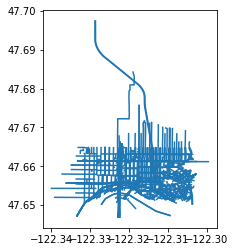

In [12]:
lines = sidewalks[sidewalks.geometry.type == 'LineString']
lines.plot()

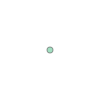

In [14]:
point = observations.loc[0].geometry
point

In [16]:
distances = lines.distance(point)
sidewalk = sidewalks.loc[distances[distances == distances.min()].index[0]]
sidewalk

timestamp                                                              2017-11-02T06:47:40
version                                                                                 58
changeset                                                                         53442273
user                                                                               Natfoot
uid                                                                                 567792
direction                                                                             None
name                                                                    Burke-Gilman Trail
network                                                                                rcn
NHS                                                                                   None
ref                                                                                   None
route                                                                              bicycle

In [32]:
mylist = [x.object for x in lines.sindex.nearest(point.bounds, 10, objects=True)]
mylist

AttributeError: 'NoneType' object has no attribute 'nearest'